In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lint.models import Token

from numpy.random import multinomial

def bootstrap(token, n=1000, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    samples = multinomial(series.sum(), series/series.sum(), n)
    
    return samples / series.sum()

In [40]:
token = 'had'

In [41]:
b1 = bootstrap(token, year1=1840, year2=1860)
b2 = bootstrap(token, year1=1980, year2=2000)

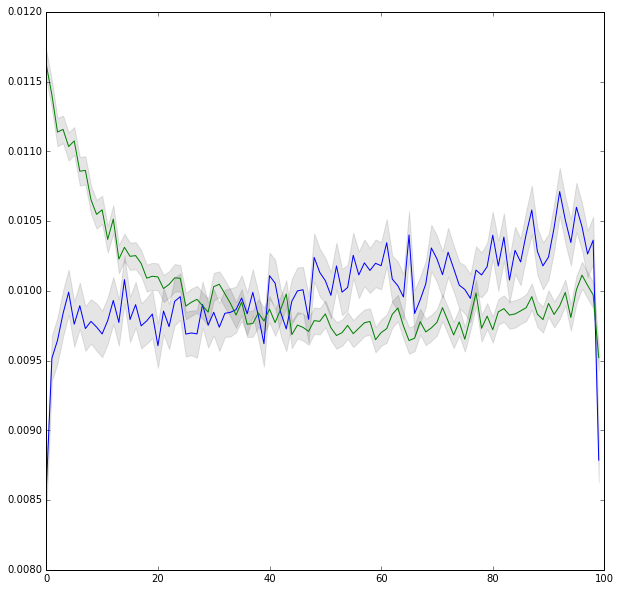

In [42]:
plt.figure(figsize=(10,10))

plt.plot(b1.mean(0))

plt.fill_between(
    range(100),
    b1.mean(0) + 2*b1.std(0),
    b1.mean(0) - 2*b1.std(0),
    color='black',
    alpha=0.1,
)

plt.plot(b2.mean(0))

plt.fill_between(
    range(100),
    b2.mean(0) + 2*b2.std(0),
    b2.mean(0) - 2*b2.std(0),
    color='black',
    alpha=0.1,
)

plt.show()

### Cohen's _d_

In [45]:
# https://en.wikipedia.org/wiki/Effect_size

import math

n1 = len(b1)
n2 = len(b2)

s1 = (
    ((b1-b1.mean())**2).sum() /
    (n1-1)
)

s2 = (
    ((b2-b2.mean())**2).sum() /
    (n2-1)
)

s = math.sqrt(
    ((n1-1)*s1 + (n2-1)*s2) /
    (n1+n2-2)
)

In [44]:
ds = []
for c1, c2 in zip(b1.T, b2.T):

    n1 = len(c1)
    n2 = len(c2)

    s1 = (
        ((c1-c1.mean())**2).sum() /
        (n1-1)
    )

    s2 = (
        ((c2-c2.mean())**2).sum() /
        (n2-1)
    )

    s = math.sqrt(
        ((n1-1)*s1 + (n2-1)*s2) /
        (n1+n2-2)
    )
    
    d = abs((c1.mean() - c2.mean()) / s)
    
    ds.append(d)
    
print(max(ds))

46.1289352524
